In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline

In [2]:
metadata_df = pd.read_csv('/Users/yuyizhang/Documents/forecasting/Energy_Data/ASHRAE_data/building_metadata.csv')
train_df = pd.read_csv('/Users/yuyizhang/Documents/forecasting/Energy_Data/ASHRAE_data/train.csv', parse_dates=['timestamp'])
weather_train_df = pd.read_csv('/Users/yuyizhang/Documents/forecasting/Energy_Data/ASHRAE_data/weather_train.csv', parse_dates=['timestamp'])

In [3]:
print(metadata_df.shape)
print(train_df.shape)
print(weather_train_df.shape)

(1449, 6)
(20216100, 4)
(139773, 9)


In [4]:
metadata_df

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [5]:
train_df

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [6]:
weather_train_df

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [3]:
train = train_df.merge(metadata_df, on='building_id', how='left')
train = train.merge(weather_train_df, on=['site_id', 'timestamp'], how='left')

In [8]:
train

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.000,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.000,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.000,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.000,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.000,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750,15,Entertainment/public assembly,19619,1914.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216096,1445,0,2016-12-31 23:00:00,4.825,15,Education,4298,NaN,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216097,1446,0,2016-12-31 23:00:00,0.000,15,Entertainment/public assembly,11265,1997.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216098,1447,0,2016-12-31 23:00:00,159.575,15,Lodging/residential,29775,2001.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [4]:
del weather_train_df, metadata_df
gc.collect();

In [5]:
#format datetime
train['timestamp']= pd.to_datetime(train['timestamp'],format='%Y-%m-%d %H:%M:%S')

In [11]:
# count the number of NaN
def find_nan(df):
    nan_lists = {}
    for col in df.columns:
        nan_counter = 0
        for nan in df[col].isnull():
            if nan:
                nan_counter+=1
                nan_lists[col] = nan_counter
    for k, v in nan_lists.items():
        print('Feature"{}" has {} NaN'.format(k,v))
        print('Feature"{}" has {} NaN'.format(k,v/len(df)))

find_nan(train)

Feature"year_built" has 12127645 NaN
Feature"year_built" has 0.5999003269671203 NaN
Feature"floor_count" has 16709167 NaN
Feature"floor_count" has 0.826527718006935 NaN
Feature"air_temperature" has 96658 NaN
Feature"air_temperature" has 0.004781238715677109 NaN
Feature"cloud_coverage" has 8825365 NaN
Feature"cloud_coverage" has 0.43655131306236117 NaN
Feature"dew_temperature" has 100140 NaN
Feature"dew_temperature" has 0.00495347767373529 NaN
Feature"precip_depth_1_hr" has 3749023 NaN
Feature"precip_depth_1_hr" has 0.18544739094088375 NaN
Feature"sea_level_pressure" has 1231669 NaN
Feature"sea_level_pressure" has 0.06092515371411895 NaN
Feature"wind_direction" has 1449048 NaN
Feature"wind_direction" has 0.0716779200736047 NaN
Feature"wind_speed" has 143676 NaN
Feature"wind_speed" has 0.007107008770237583 NaN


In [6]:
train_1 = train.dropna(axis = 0, how = 'any')

In [13]:
train_1

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
3021,565,0,2016-01-01 01:00:00,8.5000,4,Education,15326,1954.0,2.0,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
3022,566,0,2016-01-01 01:00:00,0.5210,4,Education,2010,1957.0,1.0,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
3023,569,0,2016-01-01 01:00:00,243.5000,4,Education,86091,1964.0,8.0,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
3024,570,0,2016-01-01 01:00:00,79.4880,4,Education,193202,1964.0,10.0,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
3025,571,0,2016-01-01 01:00:00,16.7500,4,Education,47954,1980.0,3.0,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20214570,651,0,2016-12-31 23:00:00,47.9940,4,Parking,306140,2007.0,5.0,12.8,2.0,3.3,0.0,1013.6,30.0,2.1
20214571,652,0,2016-12-31 23:00:00,67.9765,4,Education,150887,1959.0,9.0,12.8,2.0,3.3,0.0,1013.6,30.0,2.1
20214572,653,0,2016-12-31 23:00:00,808.4920,4,Education,420885,1930.0,8.0,12.8,2.0,3.3,0.0,1013.6,30.0,2.1
20214573,654,0,2016-12-31 23:00:00,45.1942,4,Education,43910,1912.0,5.0,12.8,2.0,3.3,0.0,1013.6,30.0,2.1


In [7]:
# Below function extracts date related features from datetime
def create_date_featues(df):

    df['Year'] = pd.to_datetime(train_1['timestamp']).dt.year
    df['Month'] = pd.to_datetime(train_1['timestamp']).dt.month
    df['Day'] = pd.to_datetime(train_1['timestamp']).dt.day
    df['Hour'] = pd.to_datetime(train_1['timestamp']).dt.hour
    df['Minute'] = pd.to_datetime(train_1['timestamp']).dt.minute
    
    return df

In [8]:
train_1 = create_date_featues(train_1)

In [9]:
for col in ['meter']:
    train_1 = pd.get_dummies(train_1, columns=[col])

In [10]:
for col in ['primary_use']:
    train_1 = pd.get_dummies(train_1, columns=[col])

In [11]:
for col in ['floor_count']:
    train_1 = pd.get_dummies(train_1, columns=[col])

In [12]:
for col in ['cloud_coverage']:
    train_1 = pd.get_dummies(train_1, columns=[col])

In [13]:
for col in ['year_built']:
    train_1 = pd.get_dummies(train_1, columns=[col])

In [14]:
for col in ['precip_depth_1_hr']:
    train_1 = pd.get_dummies(train_1, columns=[col])

In [22]:
train_1

,building_id,timestamp,meter_reading,site_id,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,...,year_built_2009.0,year_built_2011.0,year_built_2012.0,year_built_2014.0,year_built_2015.0,year_built_2016.0,precip_depth_1_hr_-1.0,precip_depth_1_hr_0.0,precip_depth_1_hr_5.0,precip_depth_1_hr_8.0
3021,565,2016-01-01 01:00:00,8.5000,4,15326,9.4,-2.2,1021.4,360.0,3.1,...,0,0,0,0,0,0,0,1,0,0
3022,566,2016-01-01 01:00:00,0.5210,4,2010,9.4,-2.2,1021.4,360.0,3.1,...,0,0,0,0,0,0,0,1,0,0
3023,569,2016-01-01 01:00:00,243.5000,4,86091,9.4,-2.2,1021.4,360.0,3.1,...,0,0,0,0,0,0,0,1,0,0
3024,570,2016-01-01 01:00:00,79.4880,4,193202,9.4,-2.2,1021.4,360.0,3.1,...,0,0,0,0,0,0,0,1,0,0
3025,571,2016-01-01 01:00:00,16.7500,4,47954,9.4,-2.2,1021.4,360.0,3.1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20214570,651,2016-12-31 23:00:00,47.9940,4,306140,12.8,3.3,1013.6,30.0,2.1,...,0,0,0,0,0,0,0,1,0,0
20214571,652,2016-12-31 23:00:00,67.9765,4,150887,12.8,3.3,1013.6,30.0,2.1,...,0,0,0,0,0,0,0,1,0,0
20214572,653,2016-12-31 23:00:00,808.4920,4,420885,12.8,3.3,1013.6,30.0,2.1,...,0,0,0,0,0,0,0,1,0,0
20214573,654,2016-12-31 23:00:00,45.1942,4,43910,12.8,3.3,1013.6,30.0,2.1,...,0,0,0,0,0,0,0,1,0,0


In [15]:
train_set = train_1[train_1['timestamp']<'2016-09-30 00:00:00']
test_set = train_1[train_1['timestamp']>='2016-09-30 00:00:00']

In [16]:
print(train_set.shape)
print(test_set.shape)

(242214, 102)
(79514, 102)


In [17]:
x_train1 = train_set.drop(columns={'building_id','site_id','timestamp','meter_reading'},axis=1)
y_train1 = train_set.loc[:,['meter_reading']]

x_test1=test_set.drop(columns={'building_id','site_id','timestamp','meter_reading'},axis=1)
y_test1=test_set.loc[:,['meter_reading']]

In [26]:

x_train1

,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,Year,Month,Day,Hour,...,year_built_2009.0,year_built_2011.0,year_built_2012.0,year_built_2014.0,year_built_2015.0,year_built_2016.0,precip_depth_1_hr_-1.0,precip_depth_1_hr_0.0,precip_depth_1_hr_5.0,precip_depth_1_hr_8.0
3021,15326,9.4,-2.2,1021.4,360.0,3.1,2016,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3022,2010,9.4,-2.2,1021.4,360.0,3.1,2016,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3023,86091,9.4,-2.2,1021.4,360.0,3.1,2016,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3024,193202,9.4,-2.2,1021.4,360.0,3.1,2016,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3025,47954,9.4,-2.2,1021.4,360.0,3.1,2016,1,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994746,306140,17.2,11.1,1018.1,290.0,6.2,2016,9,29,23,...,0,0,0,0,0,0,0,1,0,0
14994747,150887,17.2,11.1,1018.1,290.0,6.2,2016,9,29,23,...,0,0,0,0,0,0,0,1,0,0
14994748,420885,17.2,11.1,1018.1,290.0,6.2,2016,9,29,23,...,0,0,0,0,0,0,0,1,0,0
14994749,43910,17.2,11.1,1018.1,290.0,6.2,2016,9,29,23,...,0,0,0,0,0,0,0,1,0,0


In [27]:
x_test1

,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,Year,Month,Day,Hour,...,year_built_2009.0,year_built_2011.0,year_built_2012.0,year_built_2014.0,year_built_2015.0,year_built_2016.0,precip_depth_1_hr_-1.0,precip_depth_1_hr_0.0,precip_depth_1_hr_5.0,precip_depth_1_hr_8.0
14997022,15326,17.2,11.7,1017.8,280.0,7.7,2016,9,30,0,...,0,0,0,0,0,0,0,1,0,0
14997023,2010,17.2,11.7,1017.8,280.0,7.7,2016,9,30,0,...,0,0,0,0,0,0,0,1,0,0
14997024,82670,17.2,11.7,1017.8,280.0,7.7,2016,9,30,0,...,0,0,0,0,0,1,0,1,0,0
14997025,14150,17.2,11.7,1017.8,280.0,7.7,2016,9,30,0,...,0,0,0,0,0,0,0,1,0,0
14997026,86091,17.2,11.7,1017.8,280.0,7.7,2016,9,30,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20214570,306140,12.8,3.3,1013.6,30.0,2.1,2016,12,31,23,...,0,0,0,0,0,0,0,1,0,0
20214571,150887,12.8,3.3,1013.6,30.0,2.1,2016,12,31,23,...,0,0,0,0,0,0,0,1,0,0
20214572,420885,12.8,3.3,1013.6,30.0,2.1,2016,12,31,23,...,0,0,0,0,0,0,0,1,0,0
20214573,43910,12.8,3.3,1013.6,30.0,2.1,2016,12,31,23,...,0,0,0,0,0,0,0,1,0,0


In [18]:
x_train1 = x_train1.values[:].reshape(x_train1.shape[0],1,x_train1.shape[-1])
x_test1 = x_test1.values[:].reshape(x_test1.shape[0],1,x_test1.shape[-1])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, BatchNormalization,SimpleRNN,Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow.keras import Sequential 

from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score 
from tensorflow.keras.layers import Dense,LSTM,Dropout,GRU,SimpleRNN,Bidirectional 
from sklearn import metrics 

In [20]:
%%time
np.random.seed(0)
tf.random.set_seed(0)

#LSTM model

model = tf.keras.Sequential([ 
 BatchNormalization(),
 Bidirectional(SimpleRNN(128, return_sequences=True,activation='tanh')), 
 Dropout(0.1), 
 BatchNormalization(),
 Bidirectional(SimpleRNN(128,return_sequences=False)), 
 Dropout(0.2), 
 Dense(1) 
]) 

model.compile(loss='mse', optimizer='adam') 

# history = model.fit(X_train1, Y_train, batch_size=256, epochs=20, validation_data=(X_test, Y_test)) 
history = model.fit(x_train1, y_train1, batch_size=64, epochs=30,validation_data=(x_test1, y_test1)) 
# model.build(input_shape=(128,1,27))
model.summary()


Epoch 1/30
3785/3785 [==============================] - 14s 4ms/step - loss: 47006.9297 - val_loss: 17169.0918
Epoch 2/30
3785/3785 [==============================] - 13s 4ms/step - loss: 10108.8672 - val_loss: 4512.9497
Epoch 3/30
3785/3785 [==============================] - 15s 4ms/step - loss: 4310.4702 - val_loss: 2942.6584
Epoch 4/30
3785/3785 [==============================] - 14s 4ms/step - loss: 3684.2852 - val_loss: 2865.5991
Epoch 5/30
3785/3785 [==============================] - 14s 4ms/step - loss: 3571.5376 - val_loss: 2774.0908
Epoch 6/30
3785/3785 [==============================] - 18s 5ms/step - loss: 3542.7708 - val_loss: 2726.2180
Epoch 7/30
3785/3785 [==============================] - 21s 6ms/step - loss: 3495.0408 - val_loss: 2456.0027
Epoch 8/30
3785/3785 [==============================] - 17s 4ms/step - loss: 3491.4097 - val_loss: 2446.2563
Epoch 9/30
3785/3785 [==============================] - 15s 4ms/step - loss: 3446.2593 - val_loss: 2617.1406
Epoch 10/30
3785

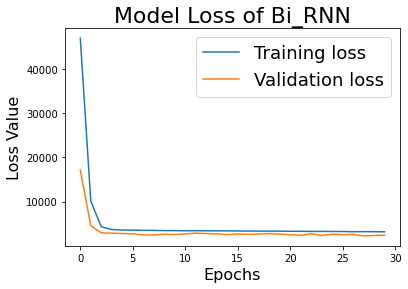

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
sns.reset_orig()
plt.title('Model Loss of Bi_RNN', fontsize = 22)
plt.plot(loss,label="Training loss")
plt.plot(val_loss,label="Validation loss")

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss Value', fontsize = 16)

plt.legend(fontsize = 18)
plt.show()

In [26]:
pred=model.predict(x_test1)

In [27]:
r2_score(y_test1,pred)

0.9688168179246183

In [28]:
mean_squared_error(y_test1,pred)

2426.7234714472497

In [29]:
df_pred = pd.DataFrame(pred)
df_y_test1 = pd.DataFrame(y_test1)
df_reset = df_y_test1.reset_index(drop = True)

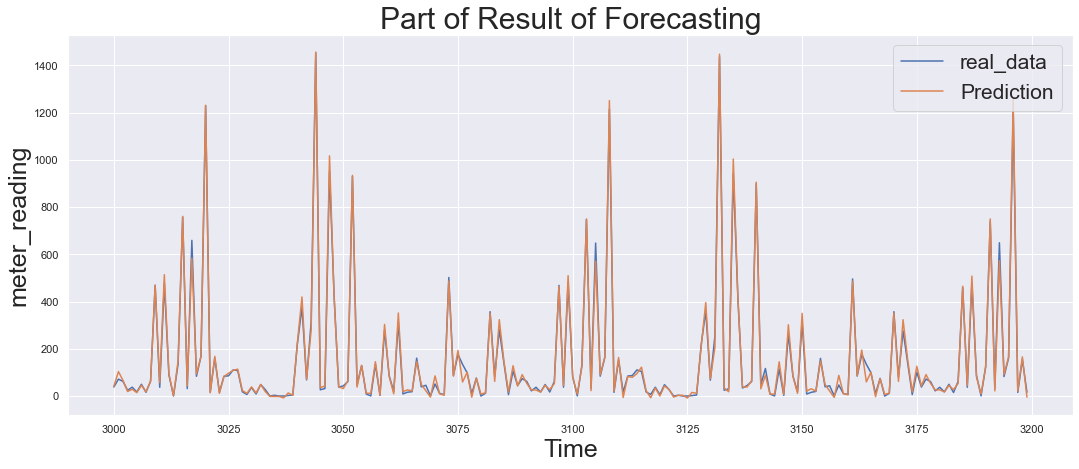

In [31]:
fig = plt.figure(figsize=(18,7))
plt.title('Part of Result of Forecasting',fontsize = 30)
plt.plot(df_reset[3000:3200],label = 'real_data')
plt.plot(df_pred[3000:3200],label = 'Prediction')
plt.xlabel('Time', fontsize = 25)
plt.ylabel('meter_reading', fontsize = 25)
plt.legend(fontsize = 21)

plt.show()